**STAT112 FINAL PROJECT**
****************
Erçin İlbay,
Abdulkadir Yörük,
Zübeyir Alp Zengin,
Bora Kırmızıbayır,
Özgür Katıkol

# Plots

In [24]:
import matplotlib.pyplot as plt #importing "matplotlib.pyplot" dictionary with global short name
import seaborn as sns #importing "seaborn" dictionary with global short name
import numpy as np #importing "numpy" dictionary with global short name
import pandas as pd #importing "pandas" dictionary with global short name

In [25]:
df = pd.read_excel('CleanedData.xlsx') # Reading the dataset
df.head() # Shows a small piece of the dataset

,Year,Month,Model,Color,Condition,Transmission,Fuel Type,Mileage,Engine Size,Price,Owner Type
0,2019,January,Fusion,Blue,Used,Automatic,Petrol,40000.0,1.5,20000.0,First
1,2018,February,Escape,Black,New,Manual,Diesel,15000.0,2.0,28000.0,Second
2,2020,March,Focus,White,Used,Automatic,Petrol,30000.0,1.6,18000.0,First
3,2017,April,Mustang,Red,Used,Automatic,Petrol,25000.0,5.0,40000.0,Third
4,2019,May,Explorer,Silver,Used,Automatic,Hybrid,35000.0,3.5,32000.0,First


In [26]:
pc = {"PG": "chocolate", "SG": "burlywood", "SF": "lightslategrey", "PF":"steelblue", "C":"darkblue"} # Since the main variable of this project is Pos,
                                                                                                      # our team decided to use spesific colors for each
                                                                                                      # position in majority of the plots
sns.set(rc={'axes.facecolor':'lavenderblush', 'figure.facecolor':'lightcyan'}) # This line of code arranges background colors of all plots in this project

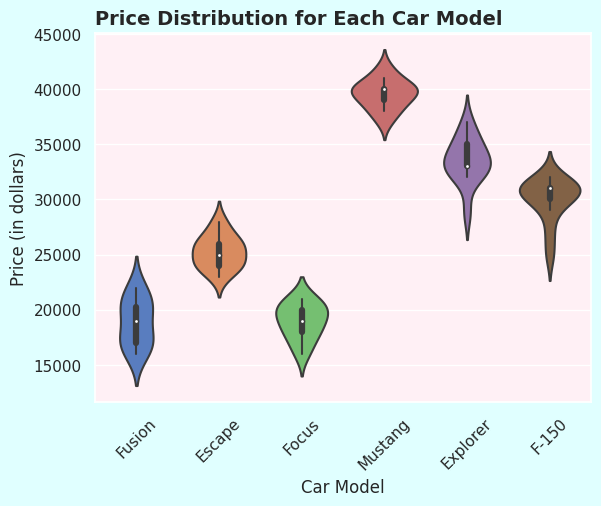

In [27]:
# RQ1: How does the price distribution vary across different car models?

sns.violinplot(data=df, x='Model', y='Price', palette="muted")
plt.title('Price Distribution for Each Car Model',
          fontweight="bold",
          fontsize=14,
          loc="left")
plt.xlabel('Car Model')
plt.ylabel('Price (in dollars)')
plt.xticks(rotation=45)
plt.show()


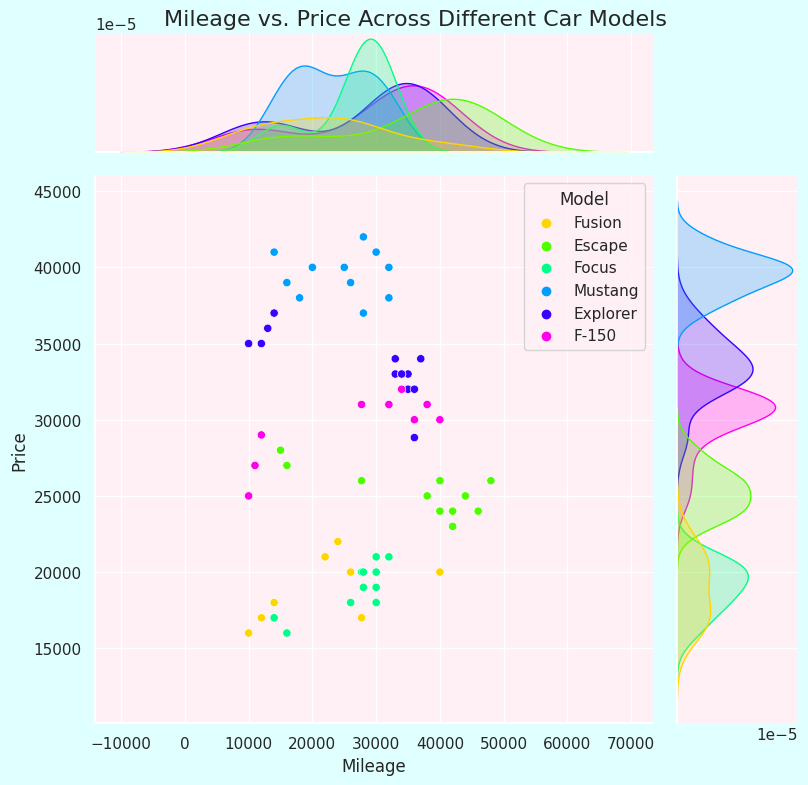

In [28]:
# RQ2:How does the mileage of cars affect their prices across different car models, and what is the distribution of mileage and prices?

# Creating a scatter plot with marginal histograms for the relationship between mileage and price across different car models

# Setting the color palette for the car models
palette = sns.color_palette("hsv", len(df['Model'].unique()))

# Creating the joint plot
g = sns.jointplot(data=df, x='Mileage', y='Price', hue='Model', palette=palette, height=8, ratio=4)

# Adding titles and labels
g.fig.suptitle('Mileage vs. Price Across Different Car Models', fontsize=16)
g.set_axis_labels('Mileage', 'Price', fontsize=12)
plt.subplots_adjust(top=0.95)  # Adjusting the title position
plt.show()


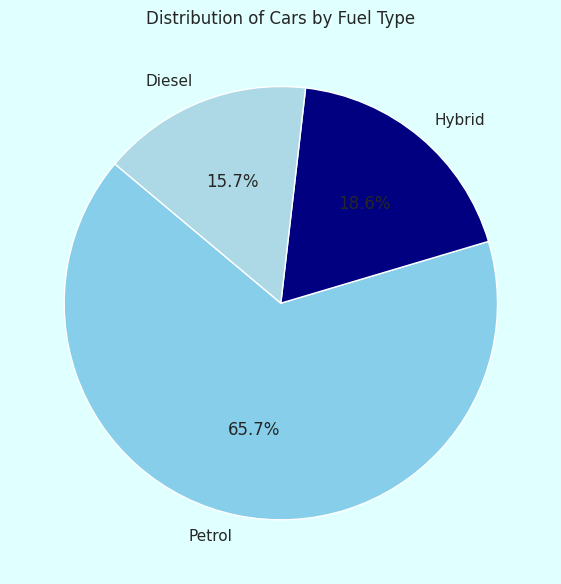

In [29]:
# RQ3: What is the distribution of cars by fuel type?

# To create a pie chart showing the distribution of cars by fuel type,
# we will count the number of cars for each fuel type.

fuel_type_counts = df['Fuel Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
fuel_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'navy', 'lightblue'], startangle=140)
plt.title('Distribution of Cars by Fuel Type')
plt.ylabel('')  # Hide the y label as it's unnecessary for pie charts
plt.tight_layout()
plt.show()

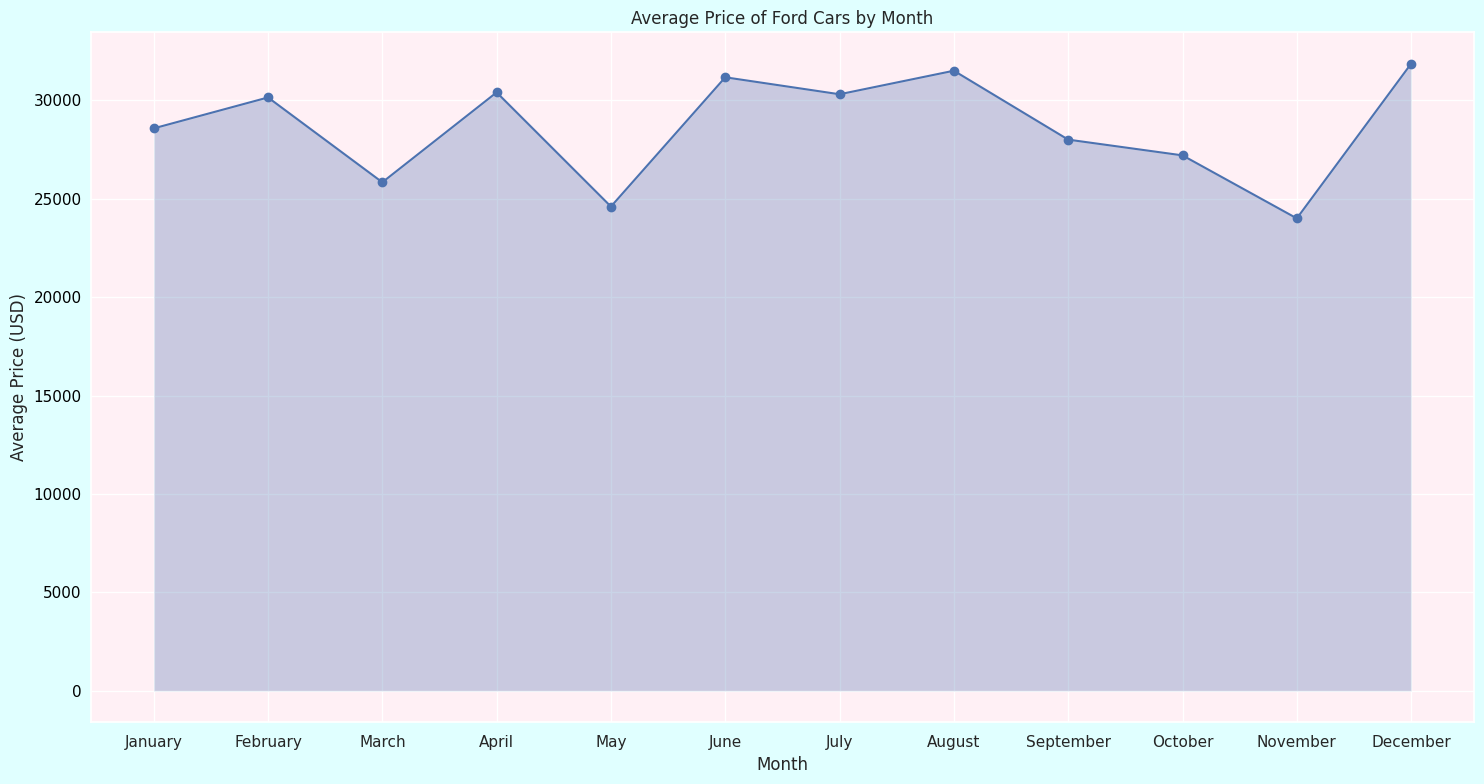

In [30]:
# RQ4: Price Trends Over Time: How does the price of Ford cars vary with the month of purchase?

# Convert the 'Month' to an ordered categorical type so that the months appear in order in the graph
df['Month'] = pd.Categorical(df['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True)

# Group by 'Month' and calculate mean
average_price_by_month = df.groupby('Month')['Price'].mean()

# Plotting the line graph with shaded area
plt.figure(figsize=(15, 8))
plt.plot(average_price_by_month.index, average_price_by_month.values, marker='o')
plt.fill_between(average_price_by_month.index, average_price_by_month.values, alpha=0.3)
plt.title('Average Price of Ford Cars by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')

# Get the current Axes instance
ax = plt.gca()

# Fix the tick_params issue for y-axis
ax.tick_params(axis='y', which='both', direction='inout', length=6, width=2, colors='black')

plt.tight_layout()
plt.show()

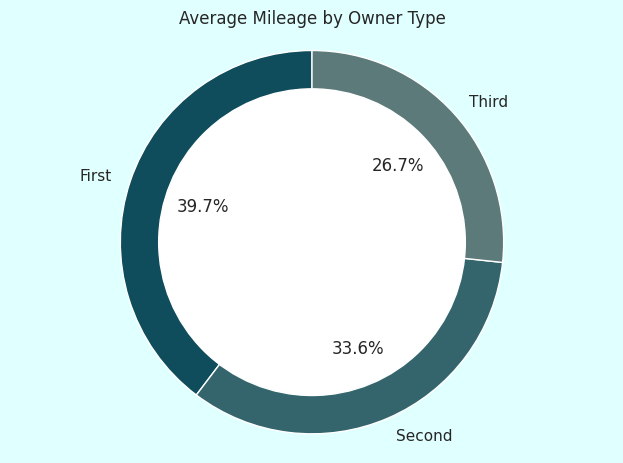

In [31]:
# RQ5:Is there a significant difference in mileage between cars owned by first, second, and third owners?

# Now that we understand the structure, we'll group the data by 'Owner Type' and calculate the average 'Mileage'
average_mileage_by_owner_type = df.groupby('Owner Type')['Mileage'].mean()

# Plotting the donut chart
fig, ax = plt.subplots()
average_mileage_by_owner_type.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=['#0f4c5c', '#34656d', '#5c7a7a'])
ax.set_ylabel('')  # Hide the y label
ax.set_title('Average Mileage by Owner Type')

# Draw a circle at the center to turn the pie into a donut
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

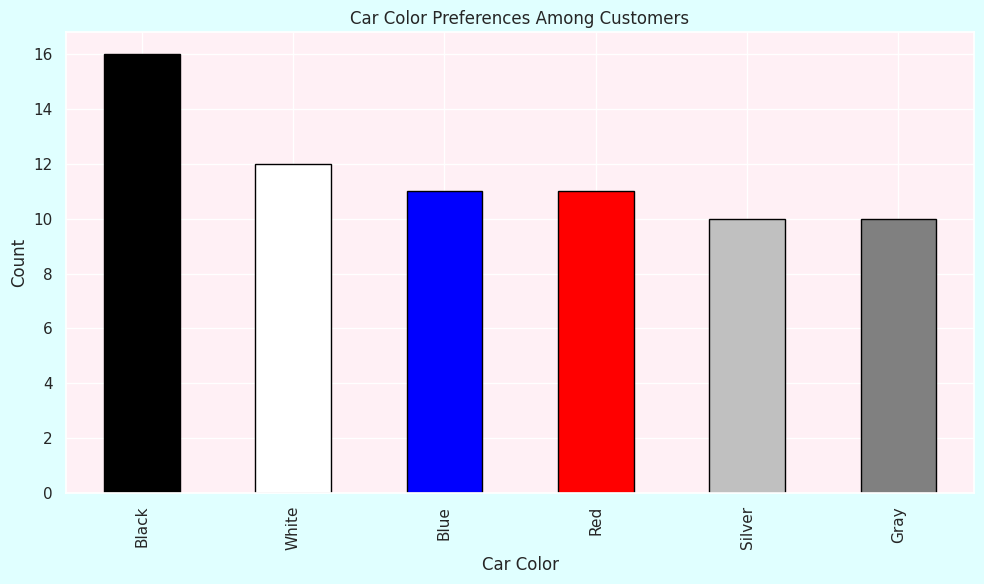

In [32]:
# RQ6: Which car colors are the most preferred among customers?

# We'll now create a bar chart to show car color preferences among customers.
# First, we count the number of cars for each color.
color_counts = df['Color'].value_counts()

# Adding an outline to the 'white' bars in the bar chart
colors = ['black', 'blue', 'gray', 'white', 'red', 'silver']  # List of colors for the bars
edge_colors = ['black' for _ in colors]  # Outline only for 'white'

# Plotting the bar chart
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color=['black', 'white','blue', 'red' , 'silver','gray' ],edgecolor=edge_colors)
plt.title('Car Color Preferences Among Customers')
plt.xlabel('Car Color')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


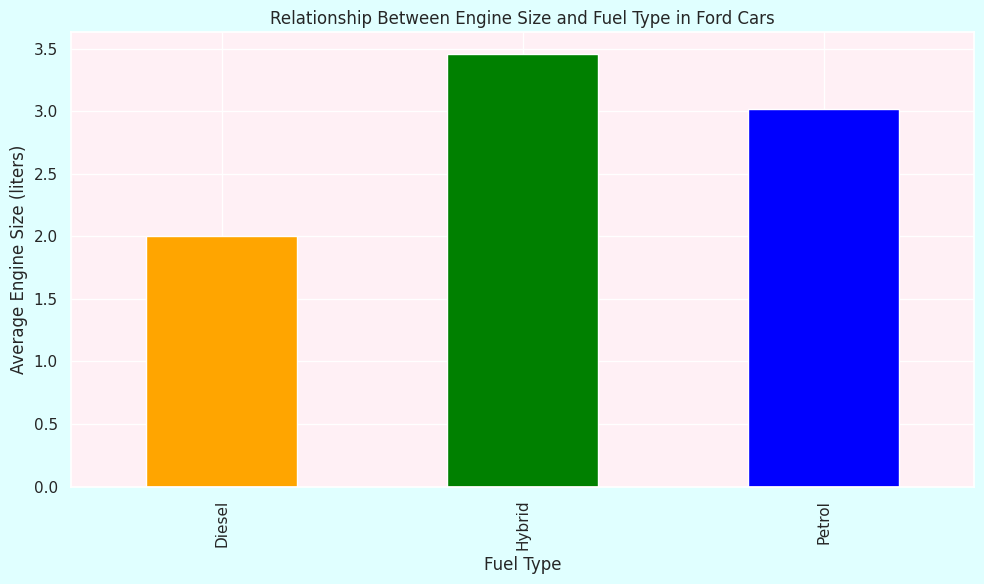

In [33]:
# RQ7: What is the relationship between the engine size and the type of fuel used in Ford cars?

# To create a bar chart showing the relationship between engine size and fuel type in Ford cars,
# we will group the data by 'Fuel Type' and calculate the average 'Engine Size' for each fuel type.

average_engine_size_by_fuel_type = df.groupby('Fuel Type')['Engine Size'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_engine_size_by_fuel_type.plot(kind='bar', color=['orange', 'green', 'blue'])
plt.title('Relationship Between Engine Size and Fuel Type in Ford Cars')
plt.xlabel('Fuel Type')
plt.ylabel('Average Engine Size (liters)')
plt.tight_layout()
plt.show()